# Instalations Required

Before Training the model, we need install this entire package bellow:

In [ ]:
!pip install kaggle --quiet

# Download HAM10000 dataset:


Because of the entire dataset demands a lot of space in compute, we will import from kanggle direct to be used in google colaboratory. After instalations above, run this code bellow:

## From kaggle:

In [ ]:
!pip install kaggle --quiet

from google.colab import files
files.upload()  # Upload your Kaggle API key file

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset into /content
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p /content --unzip

## From drive:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/ put the name of your folder'

Mounted at /content/drive


# Libraries

In [ ]:
import matplotlib.pyplot as plt  # forplotting library matplotlib
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import os  # to interact with the operating system
from glob import glob  # to search for files using patterns
import seaborn as sns  # for advanced data visualizations
from PIL import Image  # for image processing
np.random.seed(123)  # for reproducibility



# Reading and Processing data

In this step we have read the csv.

In [ ]:
base_skin_dir = '/content'  # sets the base directory path for the dataset

skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))  # reads the csv file containing metadata using the correct path

skin_df.head()  # displays the first few rows of the dataframe to check the loaded data



,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# Data Cleaning
In this step we check for Missing values and datatype of each field

In [ ]:
skin_df.isnull().sum()  # counts the number of missing values in each column

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0


As it is evident from the above that only age has null values which is 57 so we will fill the null values by their mean.

Now, lets check the presence of null values  again

In [ ]:
skin_df.isnull().sum()  # shows how many null or missing values exist in each column

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,0
sex,0
localization,0


In [ ]:
print(skin_df.dtypes)  # prints the data type of each column

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object


# Exploratory Data Analysis
In this we will explore different features of the dataset , their distrubtions and actual counts

In [ ]:
import pandas as pd  # for data handling and manipulation
import matplotlib.pyplot as plt  # for plotting and visualization
import numpy as np  # for numerical operations and arrays
import os  # to work with the file system

In [ ]:
# base path
base_dir = '/content'

os.makedirs(base_dir, exist_ok=True)  # Ensure the folder exists

# load dataset
file_path = os.path.join(base_dir, "HAM10000_metadata.csv")
metadata_df = pd.read_csv(file_path)

In [ ]:
# initial Analysis
print("Dataset Shape:", metadata_df.shape)
print("\nColumns:", metadata_df.columns.tolist())
print("\nMissing Values:\n", metadata_df.isnull().sum())
print("\nData Types:\n", metadata_df.dtypes)
print("\nSample Data:\n", metadata_df.head())

# columns analysis
print("\n dx count:", metadata_df['dx'].value_counts())
print("\n age count:", metadata_df['age'].value_counts())
print("\n sex count:", metadata_df['sex'].value_counts())
print("\n localization count:", metadata_df['localization'].value_counts())

# color palette
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#E17C05']

# create group subplot data
plot_groups = [
    # Group 1: (a) and (b)
    [
        ('a) Distribution of Diagnoses (dx)', metadata_df['dx'].value_counts(), 'Diagnosis', 'Count', 'bar'),
        ('b) Age Distribution', metadata_df['age'].dropna(), 'Age', 'Frequency', 'hist')
    ],
    # Group 2: (c) and (d)
    [
        ('c) Gender Distribution', metadata_df['sex'].value_counts(), 'Sex', 'Count', 'bar'),
        ('d) Top 10 Body Localizations', metadata_df['localization'].value_counts().head(10), 'Localization', 'Count', 'bar')
    ],
    # Group 3: (e) and (f)
    [
        ('e) Diagnosis by Gender', metadata_df.groupby(['dx', 'sex']).size().unstack(fill_value=0), 'Diagnosis', 'Count', 'stacked_bar'),
        ('f) Age by Diagnosis', metadata_df, 'Diagnosis', 'Age', 'boxplot')
    ]
]

Dataset Shape: (10015, 7)

Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

Missing Values:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Data Types:
 lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

Sample Data:
      lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

 dx count: dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
N

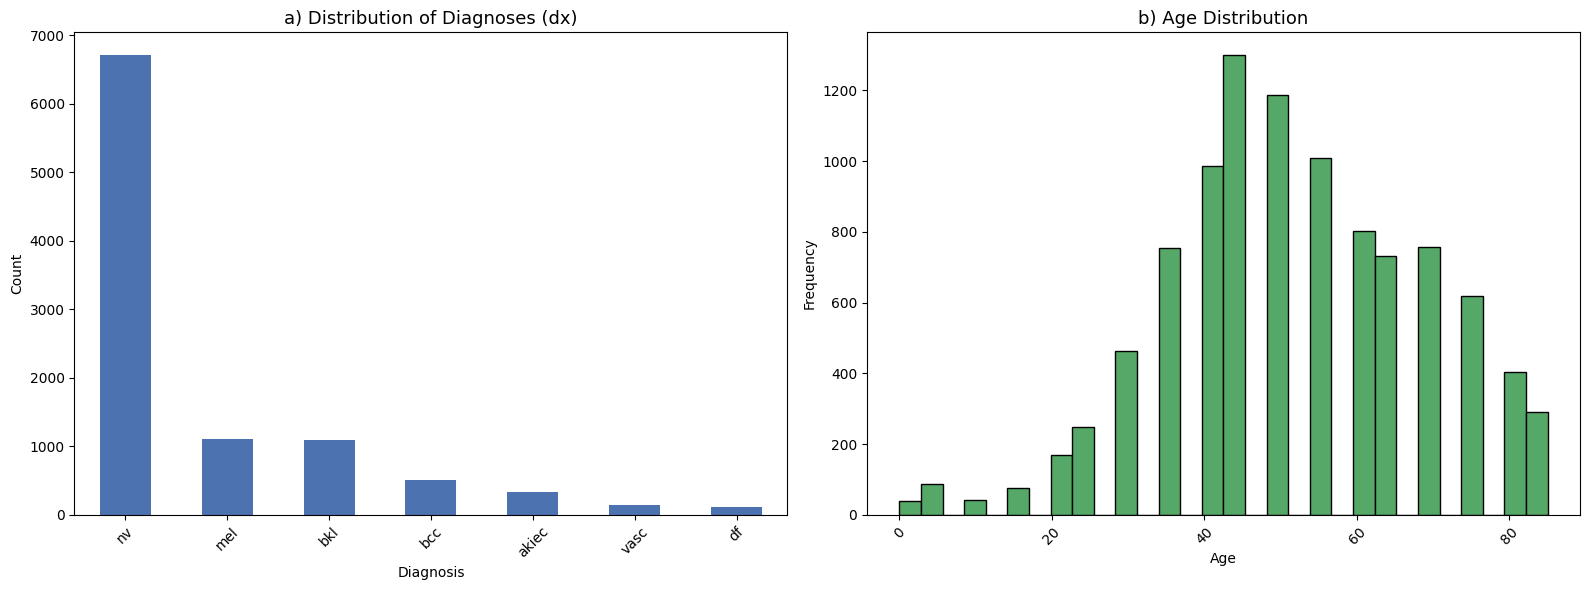

Group 1 figure saved at:
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_1.png
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_1.pdf


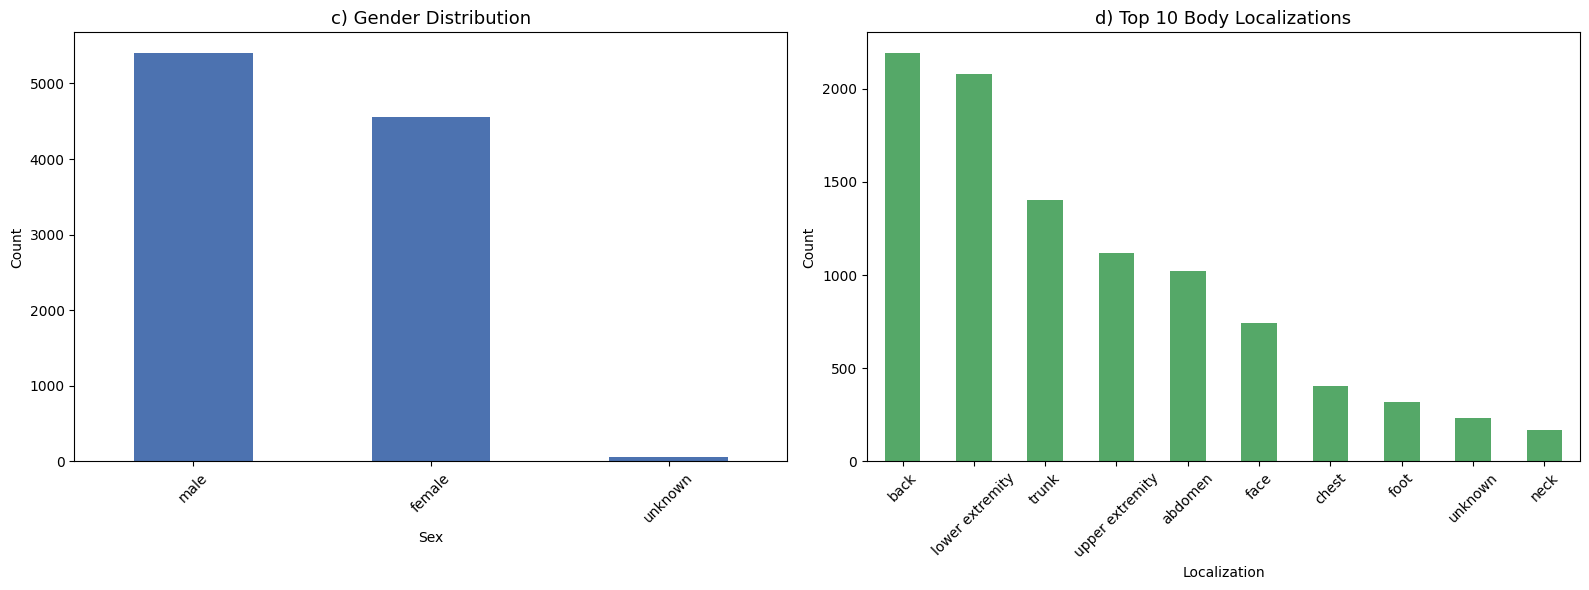

Group 2 figure saved at:
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_2.png
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_2.pdf


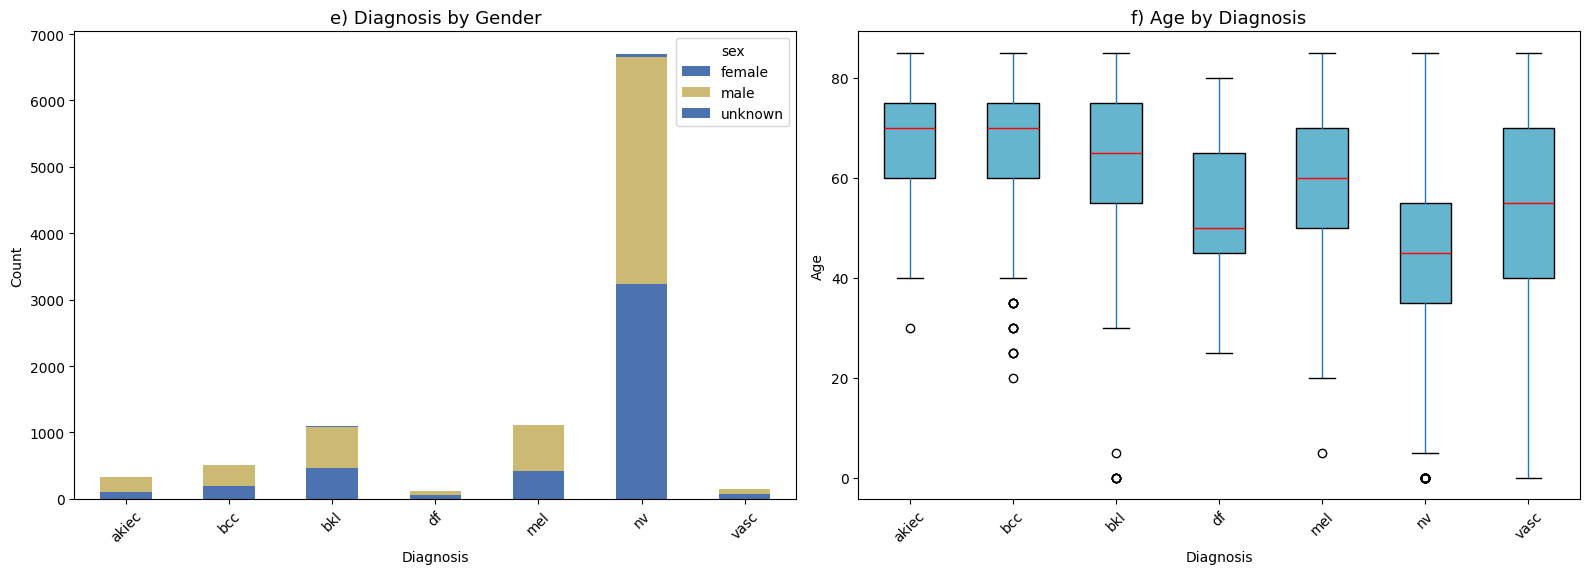

Group 3 figure saved at:
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_3.png
/content/drive/MyDrive/Colab Notebooks/archive 2/eda_group_3.pdf


In [ ]:
# iterate over each group to create separate figures
for i, group in enumerate(plot_groups, 1):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes = axes.flatten()

    for j, (title, data, xlabel, ylabel, plot_type) in enumerate(group):
        ax = axes[j]

        if plot_type == 'bar':
            data.plot(kind='bar', color=colors[j], ax=ax)
        elif plot_type == 'hist':
            ax.hist(data, bins=30, color=colors[j], edgecolor='black')
        elif plot_type == 'stacked_bar':
            data.plot(kind='bar', stacked=True, ax=ax, color=[colors[0], colors[4]])
        elif plot_type == 'boxplot':
            data.boxplot(column='age', by='dx', grid=False, patch_artist=True,
                         boxprops=dict(facecolor=colors[5], color='black'),
                         medianprops=dict(color='red'), ax=ax)
            ax.get_figure().suptitle("")  # remove pandas auto-title

        ax.set_title(title, fontsize=13)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()

    # save each figure as png and pdf
    png_path = os.path.join(base_dir, f"eda_group_{i}.png")
    pdf_path = os.path.join(base_dir, f"eda_group_{i}.pdf")
    plt.savefig(png_path, dpi=300, bbox_inches='tight')
    plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

    print(f"Group {i} figure saved at:\n{png_path}\n{pdf_path}")

Its seems from the above plot that in this dataset cell type Melanecytic nevi has very large number of instances in comparison to other cell types

# Original Dataset Images samples

Most interesting part its always better to see sample of images
Below we will show images of each cancer type

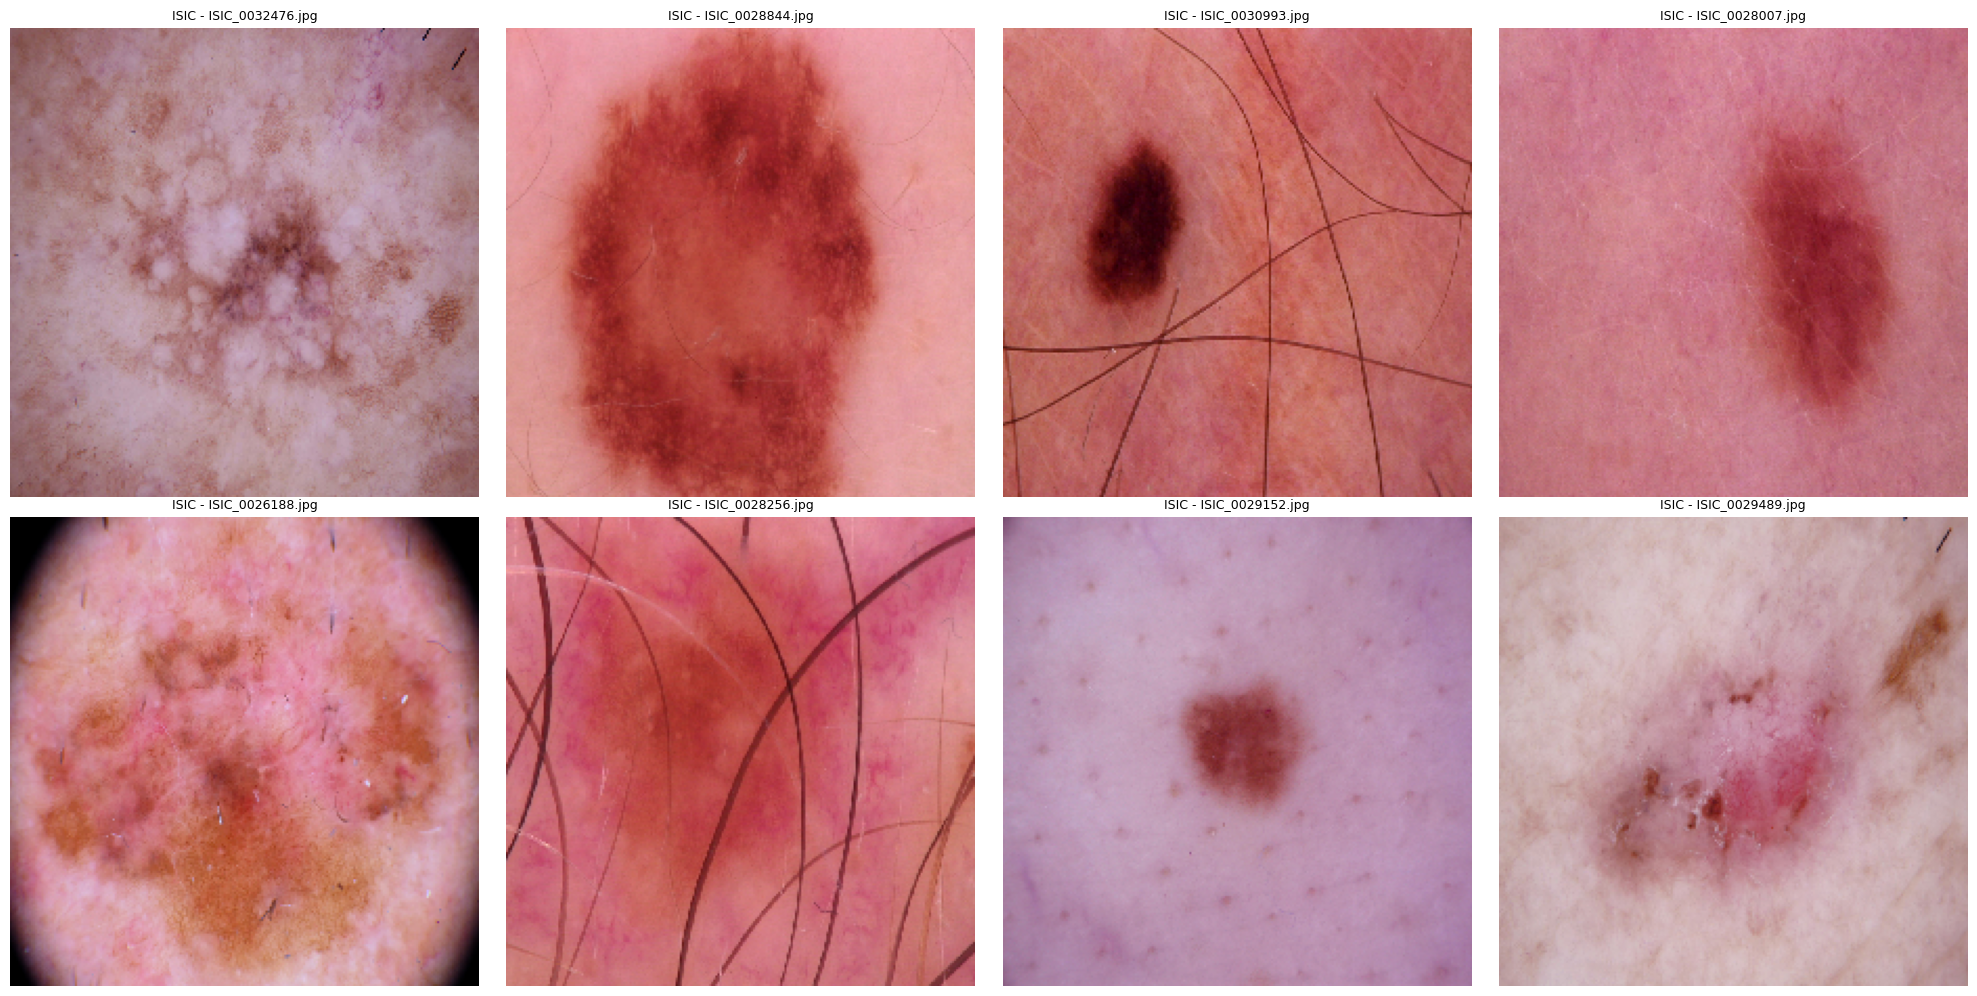

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import load_img

# Base dataset directory (adjust if your structure is different)
base_dir = '/content'

# image subdirectories
img_dir_1 = os.path.join(base_dir, 'HAM10000_images_part_1')
img_dir_2 = os.path.join(base_dir, 'HAM10000_images_part_2')

# check if image directories exist
if not os.path.exists(img_dir_1) or not os.path.exists(img_dir_2):
    raise FileNotFoundError(f"Directories not found:\n - {img_dir_1}\n - {img_dir_2}")

# get all .jpg images from both folders
image_files = glob.glob(os.path.join(img_dir_1, '*.jpg')) + glob.glob(os.path.join(img_dir_2, '*.jpg'))

if len(image_files) == 0:
    raise ValueError("No images found in the specified directories.")

# select up to 8 random images
num_samples = min(8, len(image_files))
sample_images = random.sample(image_files, num_samples)

# plot images
plt.figure(figsize=(20, 10))
for i, img_path in enumerate(sample_images):
    img = load_img(img_path, target_size=(224, 224))
    file_name = os.path.basename(img_path)
    class_prefix = file_name.split('_')[0]

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_prefix} - {file_name}", fontsize=9)

plt.tight_layout()
plt.show()